In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

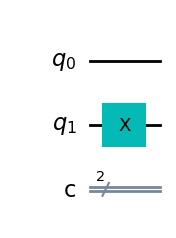

In [5]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)
qc_alice.draw()

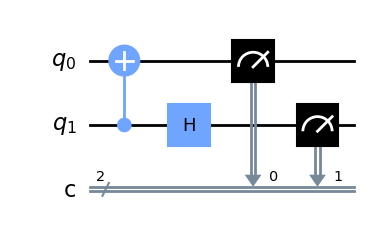

In [6]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw()

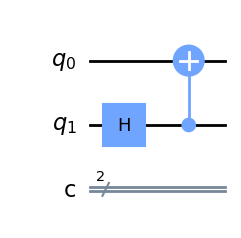

In [7]:
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

qc_charlie.draw()

In [8]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'01': 1024}

In [13]:
def infosender(msg):
# charlie creates enatngled pair
    qc_charlie = QuantumCircuit(2,2)

    qc_charlie.h(1)
    qc_charlie.cx(1,0)
    qc_bob = QuantumCircuit(2,2)
# Bob disentangles
    qc_bob.cx(1,0)
    qc_bob.h(1)
# Then measures
    qc_bob.measure([0,1],[0,1])
# alice encodes real msg string
    qc_alice = QuantumCircuit(2,2)

    if msg[-2]=='1':
        qc_alice.z(1)
    if msg[-1]=='1':
        qc_alice.x(1)
    complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
    o=backend.run(complete_qc).result().get_counts()
    print(o)
   

In [14]:
infosender("01")
infosender("00")
infosender("11")
infosender("10")

{'01': 1024}
{'00': 1024}
{'11': 1024}
{'10': 1024}
